# Conoscenza interente il dataset
Un bando di gara è suddiviso in lotti. 
Per ciascun lotto si assegnano uno o più contratti a un vincitore.


# Data quality
* uniqueness: each record is distinct
* accuracy: do data correctly represent the actual real object they stand for?
* consistency: are the data cohenrent or are there any contradictions?
* completeness: existence on non-null values
* timeliness (availability): how much time pass before a datum is available for use?
* currency: are data up-to-date?

Within the dataset:  
* the data are distinct.
* accuracy is to be estimated
* consistency: within the single record? within the whole dataset? to be estimated?
* completeness: not at all
* timeliness: time local adiministrations require to publish the data and Synapta requires to ETL
* currency: at the moment is not a problem

# italiano : english
bando : public call, public tender  
lotto : lot

# dataset

In [1]:
import numpy as np
import pandas as pd
from os import path

data_directory = "synData28June"
lotti_fn = "export_lotti_veneto_2016_2018_giulio.csv"
vincitori_fn = "export_vincitori_veneto_2016_2018_giulio.csv"

lotti = pd.read_csv(path.join(data_directory, lotti_fn), )
vincitori = pd.read_csv(path.join(data_directory, vincitori_fn))

## lotti attributi
1. **id lotto** identificatore del lotto di gara attribuito da Synapta
2. **oggetto** oggetto del contratto del lotto di gara
3. **id_scelta_contraente** identificatore numerico del metodo di assegnazione del lotto #(26)
4. **id_cpv** *common procurement vocabulary* sistema di classificazione europeo per categorizzare l'oggetto dei contratti pubblici d'acquisto
5. **importo** importo da pagare all'azienda fornitrice come definito dal contratto
6. **importo_base_asta** importo massimo per l'asta a ribasso per il dato lotto
7. **importo liquidato** importo effettivamente liquidato
8. **data inizio** data d'inizio d'esecuzione del contratto
9. **data fine** data di fine esecuzione del contratto
10. **data inferita calcolata** booleano; se vero, la/le data/e sono state inferite da ?
11. **id_lsf** identificatore lavoro, servizio, fornitura {1: lavoro, 2: servizio, 3: fornitura}
12. **id_mod_realizz** modalilità realizzazione; specifica in funzione del contratto evenutalmente rimovibile#(12)
13. **id_formagiuridica** identificatore della forma giuridica del committente
14. **md5** hash(centrale di committenza)

In [2]:
lotti.head()

,id_lotto,oggetto,id_scelta_contraente,id_cpv,importo,importo_base_asta,importo_liquidato,data_inizio,data_fine,data_inferita_calcolata,id_lsf,id_mod_realizz,id_forma_giuridica,md5
0,887826082,2017_OG1 OPERE EDILI - MANUTENZIONE ORDINARIA ...,27.0,7161.0,60000.00,NaN,NaN,2017-09-01,2017-12-30,True,1.0,13.0,154,1f2eac73c875ee65907ba4d8681a7d2a
1,14913388,SONDA PER PH METRIA ID 18P001,23.0,NaN,640.00,NaN,640.00,2018-08-09,2018-08-09,True,3.0,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
2,13973004,CAT MOUNT GIREVOLE PED,23.0,NaN,27.50,NaN,27.45,2018-05-28,2018-05-28,True,3.0,NaN,135,4c9f18d34d17b903f078e45bc25d54b1
3,18037021,Servizio di ristorazione in occasione della 53...,23.0,NaN,4545.46,NaN,3190.91,2016-03-16,2016-04-21,True,2.0,NaN,75,380ded385c850cdd5f5aa90c91f9a0a9
4,11263465,Acquisto toner,23.0,NaN,79.00,NaN,79.00,2017-02-16,2017-05-12,True,3.0,NaN,103,e2d0bdd808a492fe24340a00f8cd6f7a


In [3]:
print("how many missing variable in lotti.id_lotto?")
np.sum(pd.isna(lotti.id_lotto))

how many missing variable in lotti.id_lotto?


0

In [4]:
lotti.id_scelta_contraente.unique()
print("how many lots contain NaNs in id_scelta_contraente?")

how many lots contain NaNs in id_scelta_contraente?


In [5]:
print("which lots do not have a id_scelta_contraente?")
lotti[pd.isna(lotti.id_scelta_contraente)]

which lots do not have a id_scelta_contraente?


,id_lotto,oggetto,id_scelta_contraente,id_cpv,importo,importo_base_asta,importo_liquidato,data_inizio,data_fine,data_inferita_calcolata,id_lsf,id_mod_realizz,id_forma_giuridica,md5
1609,11972362,SERVIZI DI TRASPORTO PUBBLICO LOCALE: ACCERTAM...,NaN,NaN,1.384415e+08,NaN,51705735.13,2017-06-30,2025-12-31,True,NaN,NaN,14,47a78836496a7a97994acb6aef0d8cbf
26022,3469444,Contratto di Servizio per il trasporto pubblic...,NaN,NaN,2.226800e+09,NaN,105000.00,2018-01-01,2032-12-31,True,NaN,NaN,19,47a78836496a7a97994acb6aef0d8cbf
40783,2316458,TRIZIVIR*60CPR RIV ABACAVIR/LAMIVUDINA/ZIDOVUD...,NaN,NaN,NaN,NaN,0.00,2016-05-23,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
45428,18345252,GARA REGIONALE CIG MASTER,NaN,NaN,NaN,NaN,NaN,2016-07-01,2019-06-30,True,NaN,NaN,135,4c9f18d34d17b903f078e45bc25d54b1
49270,14164374,MIMPARA*28CPR RIV CINACALCET CLORIDRATO 2-E 20...,NaN,NaN,NaN,NaN,0.00,2016-05-24,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895045,17637222,MEROPENEM HOS*EV POLV 10FL 1G MEROPENEM L. 288...,NaN,NaN,NaN,NaN,0.00,2016-05-24,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
905129,3342376,CHIROCAINE*10F 10ML LEVOBUPIVACAINA CLORIDRATO...,NaN,NaN,NaN,NaN,0.00,2016-05-25,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
905183,4372333,ISENTRESS*FL 60CPR RIV 400MG RALTEGRAVIR POTAS...,NaN,NaN,NaN,NaN,0.00,2016-05-25,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1
922577,1753859,ZYVOXID LINEZOLID 2-E 2015/N.35 DEL 27 MARZO L...,NaN,NaN,NaN,NaN,0.00,2016-05-24,NaN,True,NaN,NaN,139,4c9f18d34d17b903f078e45bc25d54b1


In [6]:
print("how many types of provisioning?")
lotti.id_mod_realizz.unique()

how many types of provisioning?


array([13., nan,  3.,  1., 14., 11.,  4.,  9., 10.,  5.,  7.,  6.,  8.])

In [7]:
print("what percentage of records do not have a specified type of provisioning?")
np.round(np.sum(lotti.id_mod_realizz.isna()) / lotti.shape[0], 2)

what percentage of records do not have a specified type of provisioning?


0.95

In [8]:
print("how many rows does are duplicate in lotti dataset?")
np.sum(lotti.duplicated())

how many rows does are duplicate in lotti dataset?


0

## vincitori attributes
1. **id_lotto** identificatore del lotto di gara
2. **ruolo** ruolo del vincitore di gara, e.g. "mandante", "mandataria", "capogruppo" etc
3. **id_be** identificatore della business entity
3. **id_forma_giuridica** identificatore della forma giuridica del vincitore e.g. srl, sas, spa...
4. **md5** hash(centrale di committenza) del vincitore o della pa che ha bandito il lotto?

In [9]:
vincitori.head()

,id_lotto,ruolo,id_be,id_forma_giuridica,md5
0,887826082,NaN,90464,154,1f2eac73c875ee65907ba4d8681a7d2a
1,14913388,NaN,85208,176,1f2eac73c875ee65907ba4d8681a7d2a
2,13973004,NaN,89811,155,1f2eac73c875ee65907ba4d8681a7d2a
3,18037021,NaN,265228,175,1f2eac73c875ee65907ba4d8681a7d2a
4,11263465,NaN,356115,174,1f2eac73c875ee65907ba4d8681a7d2a


In [10]:
print("how many non-unique id_lotto in vincitori dataframe?")
vincitori.shape[0] - np.unique(vincitori.id_lotto).shape[0]

how many non-unique id_lotto in vincitori dataframe?


19039

In [11]:
print("duplicated items in vincitori.id_lotto")
vincitori[vincitori.id_lotto.duplicated()]

duplicated items in vincitori.id_lotto


,id_lotto,ruolo,id_be,id_forma_giuridica,md5
39,16418031,NaN,600910,171,1f2eac73c875ee65907ba4d8681a7d2a
68,933784192,NaN,95012,174,1f2eac73c875ee65907ba4d8681a7d2a
239,15751142,NaN,89503,154,1f2eac73c875ee65907ba4d8681a7d2a
341,8814713,NaN,151995,154,1f2eac73c875ee65907ba4d8681a7d2a
342,8814713,NaN,371725,154,1f2eac73c875ee65907ba4d8681a7d2a
...,...,...,...,...,...
916461,277772,NaN,407113,154,1f2eac73c875ee65907ba4d8681a7d2a
916528,11843948,NaN,91850,154,1f2eac73c875ee65907ba4d8681a7d2a
916578,14728230,NaN,110530,154,1f2eac73c875ee65907ba4d8681a7d2a
917049,18316161,01-MANDANTE,91964,154,1f2eac73c875ee65907ba4d8681a7d2a


In [12]:
print("how many rows are duplicate in vincitori dataset?")
np.sum(vincitori.duplicated())

how many rows are duplicate in vincitori dataset?


9

And we shall get rid of them. 
Davide spiega che succede perché alcune PA attribuiscono la vittoria di una gara alla medesima azienda sia in qualità di capogruppo di aziende che come singola.

In [13]:
print("how many vincitori.id_lotto are duplicated?")
np.sum(vincitori.id_lotto.duplicated())

how many vincitori.id_lotto are duplicated?


19039

this means that the same lot is won by more than one tender

In [14]:
vincitori[vincitori.id_lotto.duplicated(keep=False)]

,id_lotto,ruolo,id_be,id_forma_giuridica,md5
38,16418031,NaN,3079,176,1f2eac73c875ee65907ba4d8681a7d2a
39,16418031,NaN,600910,171,1f2eac73c875ee65907ba4d8681a7d2a
67,933784192,NaN,93326,154,1f2eac73c875ee65907ba4d8681a7d2a
68,933784192,NaN,95012,174,1f2eac73c875ee65907ba4d8681a7d2a
238,15751142,NaN,1699255,6,eaf4ac8f35faf9443c6b08dd0eee6399
...,...,...,...,...,...
916578,14728230,NaN,110530,154,1f2eac73c875ee65907ba4d8681a7d2a
917048,18316161,02-MANDATARIA,16739,176,1f2eac73c875ee65907ba4d8681a7d2a
917049,18316161,01-MANDANTE,91964,154,1f2eac73c875ee65907ba4d8681a7d2a
917269,4927733,NaN,90274,154,1f2eac73c875ee65907ba4d8681a7d2a


In [15]:
vincitori[vincitori.id_lotto.duplicated(keep=False)][vincitori.ruolo.notna()]

/var/folders/zw/jt2ycyfx58j5m2lkspywwvnm0000gn/T/ipykernel_3555/2535312974.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vincitori[vincitori.id_lotto.duplicated(keep=False)][vincitori.ruolo.notna()]


,id_lotto,ruolo,id_be,id_forma_giuridica,md5
654,5912215,03-ASSOCIATA,334337,155,1f2eac73c875ee65907ba4d8681a7d2a
655,5912215,04-CAPOGRUPPO,449509,152,1f2eac73c875ee65907ba4d8681a7d2a
804,14265562,04-CAPOGRUPPO,97782,176,1f2eac73c875ee65907ba4d8681a7d2a
805,14265562,03-ASSOCIATA,314379,154,1f2eac73c875ee65907ba4d8681a7d2a
1786,9094048,01-MANDANTE,85377,176,1f2eac73c875ee65907ba4d8681a7d2a
...,...,...,...,...,...
915843,2796660,MANDANTE,100237,154,1f2eac73c875ee65907ba4d8681a7d2a
915844,2796660,MANDANTE,107370,154,1f2eac73c875ee65907ba4d8681a7d2a
915845,2796660,MANDATARIA,133365,165,1f2eac73c875ee65907ba4d8681a7d2a
917048,18316161,02-MANDATARIA,16739,176,1f2eac73c875ee65907ba4d8681a7d2a


In [16]:
print("how many lots do not have an assigned winner?")
lotti.shape[0] - vincitori.shape[0]

how many lots do not have an assigned winner?


30197

and this is not ok, Davide said. We should investigate why.

## Lotti left-join vincitori

In [47]:
df = lotti.merge(vincitori,how="left", on="id_lotto")
df.shape

(966536, 18)

In [48]:
df.data_inizio = pd.to_datetime(df.data_inizio, yearfirst=True)
df.loc[df.id_scelta_contraente.notna(),"id_scelta_contraente"] = df[df.id_scelta_contraente.notna()].astype({"id_scelta_contraente":"int32"})
# df = df[df.id_cpv.notna()].astype({"id_cpv": "int32"})
# df = df[df.id_lsf.notna()].astype({"id_lsf": "int32"})

In [21]:
df.shape[0] - lotti.shape[0] 

-880781

There are more call-winner than lots. This is because there are more than one winner to the same public call. 

# Missing values

In [22]:
# by attribute
np.sum(df.isna(), axis=0)

id_lotto                       0
oggetto                        0
id_scelta_contraente           0
id_cpv                         0
importo                        6
importo_base_asta          60511
importo_liquidato          12315
data_inizio                    0
data_fine                   2946
data_inferita_calcolata        0
id_lsf                         0
id_mod_realizz             18226
id_forma_giuridica_x           0
md5_x                          0
ruolo                      63901
id_be                       1857
id_forma_giuridica_y        1857
md5_y                       1963
dtype: int64

In [23]:
df[df.oggetto.isna()] # non vedo alcun pattern
df[df.importo.isna() & df.importo_base_asta.notna()][["importo", "importo_base_asta"]] # esiste una base d'asta, non esiste l'importo.

,importo,importo_base_asta


In [24]:
df[df.importo.isna() & df.importo_base_asta.isna()][["importo", "importo_base_asta"]]

,importo,importo_base_asta
482155,NaN,NaN
497288,NaN,NaN
658449,NaN,NaN
767239,NaN,NaN
770705,NaN,NaN
770714,NaN,NaN


quindi la maggior parte delle volte, se non esiste l'importo, non esiste l'importo di base d'asta. il che è ragionevole

In [25]:
df[df.importo.isna() & df.importo_liquidato.isna()][["importo", "importo_liquidato"]]

,importo,importo_liquidato
497288,NaN,NaN


In [26]:
df[df.importo.isna() & (df.importo_liquidato > 0)][["importo", "importo_liquidato"]]

,importo,importo_liquidato
482155,NaN,2588.47
767239,NaN,722.13
770705,NaN,1763.70
770714,NaN,1585.44


In [27]:
np.sum(df.importo <= 0) # non esistono importi nulli tra quelli esisenti

0

# histograms

In [28]:
subdf = df.sample(frac=.001)
subdf.shape

(67, 18)

<AxesSubplot:xlabel='importo', ylabel='Count'>

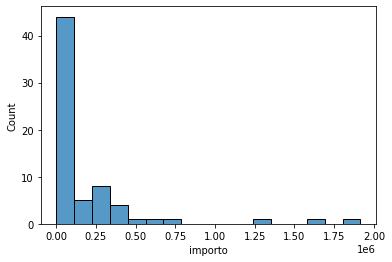

In [29]:
import seaborn as sns
sns.histplot(subdf, x="importo")

In [30]:
np.max(df.importo)

4498870906.88

In [31]:
np.min(df.importo)

0.01

In [32]:
np.sum(df.importo>1e6)

3077

<AxesSubplot:xlabel='importo', ylabel='Count'>

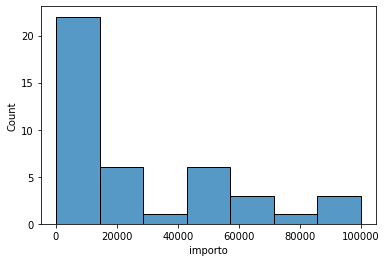

In [33]:
sns.histplot(subdf[subdf.importo < 1e5], x="importo")

sample percetage: 95.38


<AxesSubplot:xlabel='importo', ylabel='Count'>

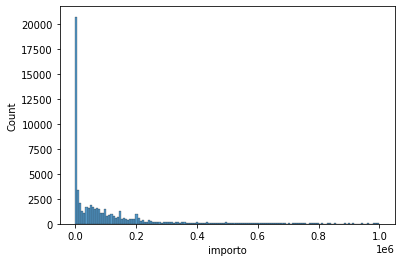

In [34]:
th = 1e6
print(f"sample percetage: {np.sum(df.importo <= th) / df.shape[0] * 100 :.2f}")
sns.histplot(df[df.importo <= th], x="importo")

sample percetage: 4.60


<AxesSubplot:xlabel='importo', ylabel='Count'>

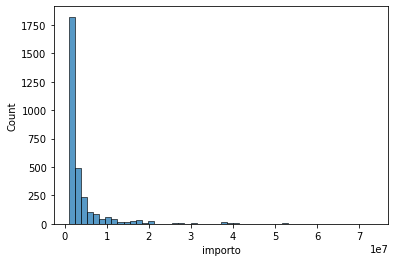

In [35]:
print(f"sample percetage: {np.sum((df.importo > th) & (df.importo < 1e8)) / df.shape[0] * 100 :.2f}")
sns.histplot(df[(df.importo > th) & (df.importo < 1e8)], x="importo", bins=50)

<AxesSubplot:xlabel='id_scelta_contraente', ylabel='count'>

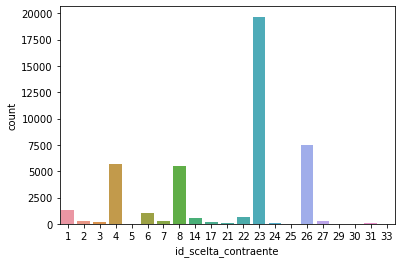

In [36]:
sns.countplot(x="id_scelta_contraente", data=df[df.importo<=1e5])

<AxesSubplot:xlabel='id_scelta_contraente', ylabel='count'>

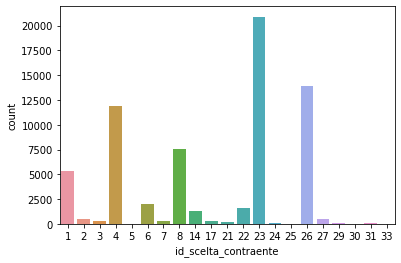

In [37]:
sns.countplot(x="id_scelta_contraente", data=df)

<AxesSubplot:xlabel='importo', ylabel='id_scelta_contraente'>

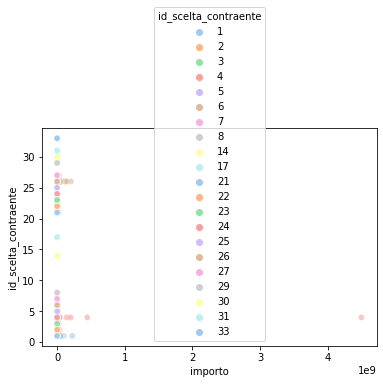

In [38]:
sns.scatterplot(
    x="importo", y="id_scelta_contraente", 
    hue="id_scelta_contraente", 
    data=df,
    alpha=.6,
    palette="pastel"
)

In [39]:
df[df.importo > 1e9]

,id_lotto,oggetto,id_scelta_contraente,id_cpv,importo,importo_base_asta,importo_liquidato,data_inizio,data_fine,data_inferita_calcolata,id_lsf,id_mod_realizz,id_forma_giuridica_x,md5_x,ruolo,id_be,id_forma_giuridica_y,md5_y
745474,9471540,"prop.952/2015, Fornitura Farmaci Enzalutamide,...",4,3121,4.498871e+09,NaN,50668.12,2016-05-27,NaN,True,3,1.0,135,4c9f18d34d17b903f078e45bc25d54b1,NaN,87468.0,176.0,1f2eac73c875ee65907ba4d8681a7d2a


questo è un outlier. l'importo erogato è stato di €50k

In [40]:
df[df.importo > 1e7]

,id_lotto,oggetto,id_scelta_contraente,id_cpv,importo,importo_base_asta,importo_liquidato,data_inizio,data_fine,data_inferita_calcolata,id_lsf,id_mod_realizz,id_forma_giuridica_x,md5_x,ruolo,id_be,id_forma_giuridica_y,md5_y
5932,1894412,Servizio accoglienza cittadini stranieri richi...,1,9051,1.071000e+07,NaN,1618226.03,2016-08-18,2016-12-31,True,2,11.0,11,eaf4ac8f35faf9443c6b08dd0eee6399,NaN,107861.0,168.0,1f2eac73c875ee65907ba4d8681a7d2a
5933,1894412,Servizio accoglienza cittadini stranieri richi...,1,9051,1.071000e+07,NaN,1618226.03,2016-08-18,2016-12-31,True,2,11.0,11,eaf4ac8f35faf9443c6b08dd0eee6399,NaN,97295.0,165.0,1f2eac73c875ee65907ba4d8681a7d2a
5934,1894412,Servizio accoglienza cittadini stranieri richi...,1,9051,1.071000e+07,NaN,1618226.03,2016-08-18,2016-12-31,True,2,11.0,11,eaf4ac8f35faf9443c6b08dd0eee6399,NaN,238355.0,154.0,1f2eac73c875ee65907ba4d8681a7d2a
5935,1894412,Servizio accoglienza cittadini stranieri richi...,1,9051,1.071000e+07,NaN,1618226.03,2016-08-18,2016-12-31,True,2,11.0,11,eaf4ac8f35faf9443c6b08dd0eee6399,NaN,85954.0,163.0,1f2eac73c875ee65907ba4d8681a7d2a
5936,1894412,Servizio accoglienza cittadini stranieri richi...,1,9051,1.071000e+07,NaN,1618226.03,2016-08-18,2016-12-31,True,2,11.0,11,eaf4ac8f35faf9443c6b08dd0eee6399,NaN,613570.0,163.0,1f2eac73c875ee65907ba4d8681a7d2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939842,711593573,CONTRATTO AI SENSI DELL'ART.153 COMMI 1-14 DEL...,1,6547,2.248128e+08,202080000.0,NaN,2018-03-14,2025-02-10,True,1,6.0,135,4c9f18d34d17b903f078e45bc25d54b1,NaN,2850053.0,176.0,1f2eac73c875ee65907ba4d8681a7d2a
954789,217331,CONCESSIONE IN REGIME DI PROJECT FINANCING DEL...,1,9436,5.252720e+07,NaN,0.00,2018-06-28,2020-09-24,True,2,6.0,15,47a78836496a7a97994acb6aef0d8cbf,01-MANDANTE,108491.0,176.0,1f2eac73c875ee65907ba4d8681a7d2a
954790,217331,CONCESSIONE IN REGIME DI PROJECT FINANCING DEL...,1,9436,5.252720e+07,NaN,0.00,2018-06-28,2020-09-24,True,2,6.0,15,47a78836496a7a97994acb6aef0d8cbf,01-MANDANTE,128052.0,176.0,1f2eac73c875ee65907ba4d8681a7d2a
954791,217331,CONCESSIONE IN REGIME DI PROJECT FINANCING DEL...,1,9436,5.252720e+07,NaN,0.00,2018-06-28,2020-09-24,True,2,6.0,15,47a78836496a7a97994acb6aef0d8cbf,02-MANDATARIA,1811097.0,154.0,1f2eac73c875ee65907ba4d8681a7d2a


<AxesSubplot:xlabel='id_cpv', ylabel='Count'>

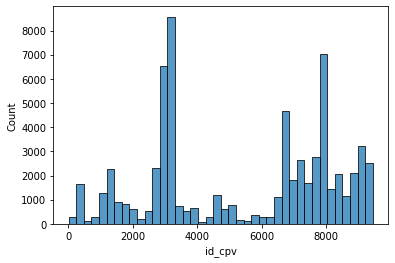

In [41]:
sns.histplot(data=df, x="id_cpv")

<AxesSubplot:xlabel='id_lsf', ylabel='count'>

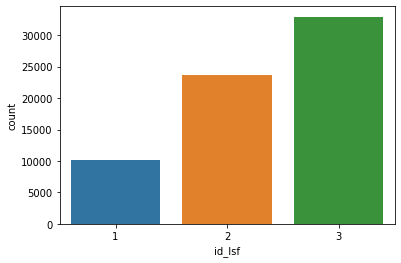

In [42]:
sns.countplot(data=df, x="id_lsf")

# Isolation forest
The sklearn implementation wants X{array-like, sparse matrix} of shape (n_samples, n_features). 
Hence, I must handle missing values.

In [43]:
df.data_inizio

0        2017-09-01
10       2018-12-19
19       2018-05-09
26       2017-02-28
31       2017-12-04
            ...    
966460   2017-06-13
966466   2016-01-01
966479   2018-03-01
966530   2018-01-01
966534   2018-06-26
Name: data_inizio, Length: 66716, dtype: datetime64[ns]